# Import nessesry Libraries  


In [156]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import datasets
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.tree import  DecisionTreeClassifier
from sklearn import tree
from sklearn.metrics import classification_report
from sklearn import preprocessing

# Load the Data from CSV

In [157]:
Df_Obese = pd.read_csv('Obesity.csv')

# Analyze the Data

In [158]:
Df_Obese.head()

,ID,Age,Gender,Height,Weight,BMI,Label
0,1,25,Male,175,80,25.3,Normal Weight
1,2,30,Female,160,60,22.5,Normal Weight
2,3,35,Male,180,90,27.3,Overweight
3,4,40,Female,150,50,20.0,Underweight
4,5,45,Male,190,100,31.2,Obese


In [159]:
Df_Obese.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 108 entries, 0 to 107
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   ID      108 non-null    int64  
 1   Age     108 non-null    int64  
 2   Gender  108 non-null    object 
 3   Height  108 non-null    int64  
 4   Weight  108 non-null    int64  
 5   BMI     108 non-null    float64
 6   Label   108 non-null    object 
dtypes: float64(1), int64(4), object(2)
memory usage: 6.0+ KB


In [160]:
Df_Obese.describe()

,ID,Age,Height,Weight,BMI
count,108.000000,108.000000,108.000000,108.000000,108.000000
mean,56.046296,46.555556,166.574074,59.490741,20.549074
std,31.917939,24.720620,27.873615,28.856233,7.583818
min,1.000000,11.000000,120.000000,10.000000,3.900000
25%,28.750000,27.000000,140.000000,35.000000,16.700000
50%,56.500000,42.500000,175.000000,55.000000,21.200000
75%,83.250000,59.250000,190.000000,85.000000,26.100000
max,110.000000,112.000000,210.000000,120.000000,37.200000


In [161]:
Df_Obese.iloc[:,0:13]

,ID,Age,Gender,Height,Weight,BMI,Label
0,1,25,Male,175,80,25.3,Normal Weight
1,2,30,Female,160,60,22.5,Normal Weight
2,3,35,Male,180,90,27.3,Overweight
3,4,40,Female,150,50,20.0,Underweight
4,5,45,Male,190,100,31.2,Obese
...,...,...,...,...,...,...,...
103,106,11,Male,175,10,3.9,Underweight
104,107,16,Female,160,10,3.9,Underweight
105,108,21,Male,180,15,5.6,Underweight
106,109,26,Female,150,15,5.6,Underweight


In [162]:
Df_Obese_lablencoded= Df_Obese.copy()

In [163]:
#Complete Obese dataset
label_encoder = preprocessing.LabelEncoder()
Df_Obese_lablencoded['Label']= label_encoder.fit_transform(Df_Obese_lablencoded['Label'])

In [164]:
#Complete Obese dataset
label_encoder = preprocessing.LabelEncoder()
Df_Obese_lablencoded['Gender']= label_encoder.fit_transform(Df_Obese_lablencoded['Gender'])

In [165]:
Df_Obese_lablencoded.head()

,ID,Age,Gender,Height,Weight,BMI,Label
0,1,25,1,175,80,25.3,0
1,2,30,0,160,60,22.5,0
2,3,35,1,180,90,27.3,2
3,4,40,0,150,50,20.0,3
4,5,45,1,190,100,31.2,1


In [166]:
x=Df_Obese_lablencoded.iloc[:,1:6]
y=Df_Obese_lablencoded['Label']

In [167]:
x

,Age,Gender,Height,Weight,BMI
0,25,1,175,80,25.3
1,30,0,160,60,22.5
2,35,1,180,90,27.3
3,40,0,150,50,20.0
4,45,1,190,100,31.2
...,...,...,...,...,...
103,11,1,175,10,3.9
104,16,0,160,10,3.9
105,21,1,180,15,5.6
106,26,0,150,15,5.6


In [168]:
y

0      0
1      0
2      2
3      3
4      1
      ..
103    3
104    3
105    3
106    3
107    3
Name: Label, Length: 108, dtype: int64

In [169]:
Df_Obese_lablencoded['Label'].unique()

array([0, 2, 3, 1])

In [170]:
Df_Obese_lablencoded.Label.value_counts()

Label
3    47
0    29
2    20
1    12
Name: count, dtype: int64

In [171]:
# Splitting data into training and testing data set
x_train, x_test,y_train,y_test = train_test_split(x,y, test_size=0.2,random_state=40)

In [172]:
x_train

,Age,Gender,Height,Weight,BMI
40,27,1,180,75,24.2
54,97,1,200,95,27.0
23,83,0,150,50,20.0
9,70,0,120,20,10.0
26,98,1,200,110,34.2
...,...,...,...,...,...
56,107,1,210,105,28.9
37,64,0,120,95,29.1
7,60,0,130,30,13.3
91,53,1,210,55,21.2


In [173]:
y_train

40    0
54    2
23    3
9     3
26    1
     ..
56    1
37    2
7     3
91    0
70    0
Name: Label, Length: 86, dtype: int64

#Building Decision Tree Classifier using Entropy Criteria

In [174]:
model = DecisionTreeClassifier(criterion = 'entropy',max_depth=4)
model.fit(x_train,y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=4)

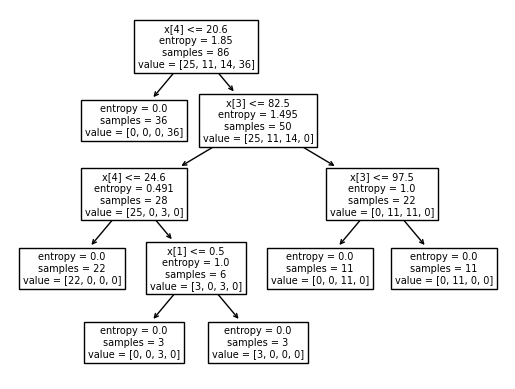

In [175]:
#PLot the decision tree
tree.plot_tree(model);

In [176]:
#Predicting on test data
preds = model.predict(x_test) # predicting on test data set
pd.Series(preds).value_counts() # getting the count of each category

3    11
2     6
0     4
1     1
Name: count, dtype: int64

In [177]:
y_test

15     3
63     0
17     3
93     3
2      2
78     3
103    3
39     3
4      1
84     3
32     2
107    3
11     3
38     0
45     2
48     0
42     2
51     0
89     3
57     2
64     2
86     3
Name: Label, dtype: int64

In [178]:
preds

array([3, 0, 3, 3, 2, 3, 3, 3, 1, 3, 2, 3, 3, 0, 2, 0, 2, 0, 3, 2, 2, 3])

In [179]:
pd.crosstab(y_test,preds) # getting the 2 way table to understand the correct and wrong predictions

col_0,0,1,2,3
Label,,,,
0,4,0,0,0
1,0,1,0,0
2,0,0,6,0
3,0,0,0,11


In [180]:
# Accuracy
np.mean(preds==y_test)

1.0

## Building Decision Tree Classifier (CART) using Gini Criteria

In [181]:
from sklearn.tree import DecisionTreeClassifier
model_gini = DecisionTreeClassifier(criterion='gini', max_depth=4)

In [182]:
model_gini.fit(x_train, y_train)

DecisionTreeClassifier(max_depth=4)

In [183]:
#Prediction and computing the accuracy
pred=model.predict(x_test)
np.mean(preds==y_test)

1.0